In [1]:
include("../folder_path.jl")
import Pkg
Pkg.activate(project_folder)

  Activating project at `~/AAV2`


In [2]:
using JLD2, BSON, Flux, PhageTree, PyPlot, BioSeqInt

In [3]:
include(project_folder*"analysis/utils.jl")

compute_accuracy (generic function with 1 method)

# Data

In [6]:
sequences_experiemnt1, counts_experiment1, labels_experiment1 = 
    load_data_cnn("$(project_folder)my_data/data_experiment1.jld2", -1.0, "experiment1")

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; … ;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0], [1439 349; 2829 3326; … ; 2053 6849; 4249 409], Float32[1.0 0.0 … 0.0 1.0; 0.0 1.0 … 1.0 0.0])

In [7]:
data_experiment1 = load_data_phagetree("$(project_folder)my_data/data_experiment1.jld2", "experiment1")

Data{Array{Float32, 3}, Matrix{Int64}, Tuple{Int64, Int64}, Matrix{Float64}}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0], [1439 349; 2829 3326; … ; 2053 6849; 4249 409], (0, 1), [14.700870631031822 15.065945103499908], [7.488852955733459 7.488852955733459; 8.725020038618554 8.725020038618554; … ; 9.0940312495758 9.0940312495758; 8.446341450444287 8.446341450444287], [1.6102474722082924e7 1.939298450233949e7])

In [ ]:
mb_sizes = [32, 64, 128, 256, 512]

# CNN

### experiment 1

In [9]:
function load_models(path)
    file = BSON.load(path)
    return file[:models], file[:histories]
end

load_models (generic function with 1 method)

In [ ]:
models_cnn, histories_cnn = load_models(project_folder*"cnn_models/finetune_experiment1.bson");

In [ ]:
collect(plot(get(h, :training_loss)...) for h in histories_cnn)
legend(mb_sizes)
xlabel("epochs")
ylabel("loss");

### experiment 2

In [10]:
models_cnn2, histories_cnn2 = load_models(project_folder*"cnn_models/finetune_experiment2_bis.bson");

In [11]:
mb_sizes = [512, 1024, 2048]

3-element Vector{Int64}:
  512
 1024
 2048

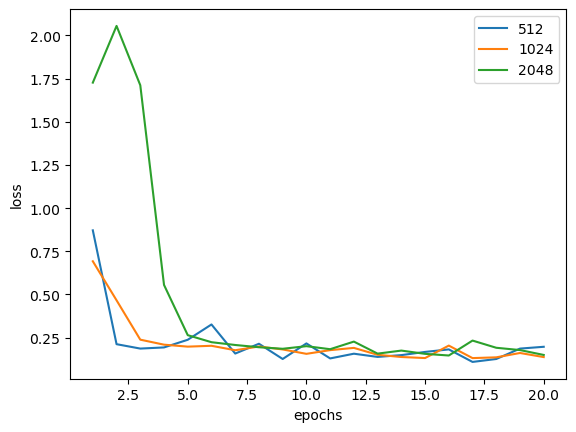

In [12]:
collect(plot(get(h, :training_loss)...) for h in histories_cnn2)
legend(mb_sizes)
xlabel("epochs")
ylabel("loss");

# PhageTree

In [ ]:
models_pt, histories_pt = load_models(project_folder*"phagetree_models/finetune_experiment1.bson");

In [ ]:
collect(plot(get(h, :loglikelihood)...) for h in histories_pt)
legend(mb_sizes)
xlabel("epochs")
ylabel("loglikelihood");

In [ ]:
models_pt2, histories_pt2 = load_models(project_folder*"phagetree_models/fnetune_experiment2.bson");

In [ ]:
collect(plot(get(h, :loglikelihood)...) for h in histories_pt2)
legend(mb_sizes)
xlabel("epochs")
ylabel("loglikelihood");